# Frontier Detection Visualization

This notebook visualizes the detected frontiers in a 10x10 occupancy grid map.

In [2]:
# Map and frontier detection logic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class Map:
    def __init__(self):
        self.data = [
             -1,   0,  -1,  -1,  -1, 100,  -1,   0,  -1,  -1,
             -1,   0,  -1,  -1,   0, 100,   0,   0,  -1,  -1,
             -1,   0,  -1,  -1,   0, 100,   0,   0,  -1,  -1,
             -1,   0,  -1,   0,   0, 100,   0,   0,  -1,  -1,
              0,   0,  -1,   0,   0,   0,   0,   0,  -1,  -1,
            100,   0,   0,   0,   0,   0,   0,   0,   0,  -1,
            100,   0,   0,   0,   0,   0,   0,   0,   0,  -1,
            100,   0,   0,   0,   0,   0,   0, 100,   0, 100,
            100,   0,   0, 100, 100,   0,   0, 100,   0, 100,
            100, 100, 100, 100, 100, 100, 100, 100, 100, 100
        ]
        self.height = 10
        self.width = 10

def index_to_grid(index: int, width: int):
    row = index // width
    col = index % width
    return (row, col)

def neighbors_8(index: int, width: int, height: int):
    row, col = index_to_grid(index, width)
    neighbors = []
    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            if dr == 0 and dc == 0:
                continue
            nr, nc = row + dr, col + dc
            if 0 <= nr < height and 0 <= nc < width:
                neighbors.append(nr * width + nc)
    return neighbors

In [3]:
def get_frontier_cells(map_obj):
    frontier_cells = []
    for index, cell in enumerate(map_obj.data):
        if cell == 0:
            next_to_cells = neighbors_8(index, map_obj.width, map_obj.height)
            for item in next_to_cells:
                if map_obj.data[item] == -1:
                    frontier_cells.append(index)
                    break
    return frontier_cells

m = Map()
frontiers = get_frontier_cells(m)
print('Detected frontier indices:', sorted(frontiers))

Detected frontier indices: [1, 7, 11, 14, 16, 17, 21, 24, 27, 31, 33, 34, 37, 40, 41, 43, 47, 51, 52, 53, 57, 58, 68, 78]


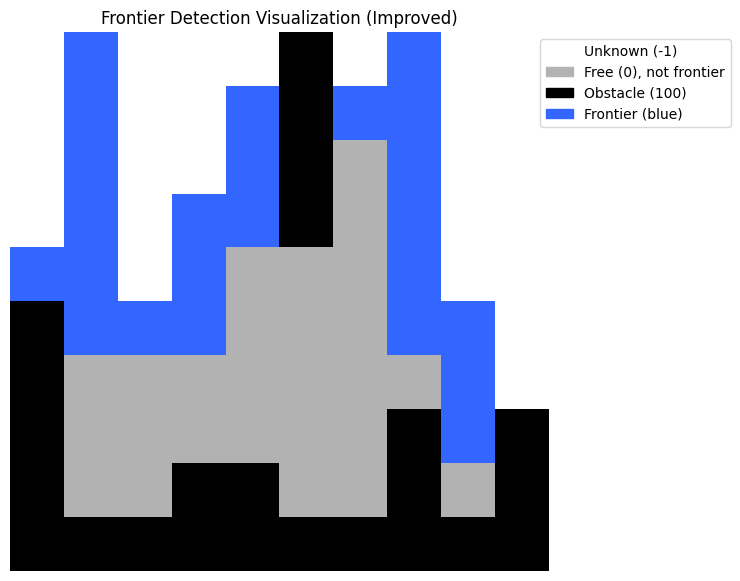

In [ ]:
# thnaks for the visualizer copilot!
# Prepare RGB image for the map
map_grid = np.array(m.data).reshape((m.height, m.width))
rgb_img = np.ones((m.height, m.width, 3))  # start with white

# Color code: unknown (-1): white, obstacle (100): black, free (0): gray
for r in range(m.height):
    for c in range(m.width):
        val = map_grid[r, c]
        if val == -1:
            rgb_img[r, c] = [1, 1, 1]      # white
        elif val == 100:
            rgb_img[r, c] = [0, 0, 0]      # black
        elif val == 0:
            rgb_img[r, c] = [0.7, 0.7, 0.7]  # gray

# Overlay frontiers as blue
for idx in frontiers:
    r, c = index_to_grid(idx, m.width)
    rgb_img[r, c] = [0.2, 0.4, 1.0]  # vivid blue

plt.figure(figsize=(7,7))
plt.imshow(rgb_img, interpolation='none')
plt.title('Frontier Detection Visualization')

# Create custom legend
unknown_patch = mpatches.Patch(color='white', label='Unknown (-1)')
free_patch = mpatches.Patch(color='#b3b3b3', label='Free (0), not frontier')
obstacle_patch = mpatches.Patch(color='black', label='Obstacle (100)')
frontier_patch = mpatches.Patch(color='#3366ff', label='Frontier (blue)')
plt.legend(handles=[unknown_patch, free_patch, obstacle_patch, frontier_patch],
           loc='upper right', bbox_to_anchor=(1.35, 1))

plt.axis('off')
plt.show()